<p>The following undirected network consists of seven vertices and twelve edges with a total weight of 243.</p>
<div style="text-align: center">
<img src="https://projecteuler.net/resources/images/0107_1.png?1678992052" class="dark_img" alt=""><br></div>
<p>The same network can be represented by the matrix below.</p>
<table cellpadding="5" cellspacing="0" border="1" align="center"><tr><td>    </td><td><b>A</b></td><td><b>B</b></td><td><b>C</b></td><td><b>D</b></td><td><b>E</b></td><td><b>F</b></td><td><b>G</b></td>
</tr><tr><td><b>A</b></td><td>-</td><td>16</td><td>12</td><td>21</td><td>-</td><td>-</td><td>-</td>
</tr><tr><td><b>B</b></td><td>16</td><td>-</td><td>-</td><td>17</td><td>20</td><td>-</td><td>-</td>
</tr><tr><td><b>C</b></td><td>12</td><td>-</td><td>-</td><td>28</td><td>-</td><td>31</td><td>-</td>
</tr><tr><td><b>D</b></td><td>21</td><td>17</td><td>28</td><td>-</td><td>18</td><td>19</td><td>23</td>
</tr><tr><td><b>E</b></td><td>-</td><td>20</td><td>-</td><td>18</td><td>-</td><td>-</td><td>11</td>
</tr><tr><td><b>F</b></td><td>-</td><td>-</td><td>31</td><td>19</td><td>-</td><td>-</td><td>27</td>
</tr><tr><td><b>G</b></td><td>-</td><td>-</td><td>-</td><td>23</td><td>11</td><td>27</td><td>-</td>
</tr></table><p>However, it is possible to optimise the network by removing some edges and still ensure that all points on the network remain connected. The network which achieves the maximum saving is shown below. It has a weight of 93, representing a saving of 243 − 93 = 150 from the original network.</p>
<div style="text-align: center">
<img src="https://projecteuler.net/resources/images/0107_2.png?1678992052" class="dark_img" alt=""><br></div>
<p>Using <a href="resources/documents/0107_network.txt">network.txt</a> (right click and 'Save Link/Target As...'), a 6K text file containing a network with forty vertices, and given in matrix form, find the maximum saving which can be achieved by removing redundant edges whilst ensuring that the network remains connected.</p>


In [99]:
import numpy as np
import networkx as nx
import re
import matplotlib.pyplot as plt
import os
path = os.path.join(os.path.dirname(os.getcwd()),'xxx_ProjectEulerData','0107_network.txt')

In [117]:
with open(path) as file:
    file_line = file.read().split('\n')[:-1]
    for i, l in enumerate(file_line):
        file_line[i] = [int(re.compile(r'-').sub('0',ele)) for ele in l.split(',') if ele != '']
    
arr_weights = np.array(file_line)
arr_adj = (arr_weights != 0).astype(int)

In [118]:
G = nx.from_numpy_array(arr_weights, parallel_edges=False)

In [119]:
G_s = nx.minimum_spanning_tree(G)

In [120]:
total_weight_small = 0
for edge_data in G_s.edges(data=True):
    weight = edge_data[2].get('weight',0)
    total_weight_small += weight

total_weight = 0
for edge_data in G.edges(data=True):
    weight = edge_data[2].get('weight',0)
    total_weight += weight

In [128]:
print(f'Weights in originl matrix : {total_weight}\nWeights in minimal matrix : {total_weight_small}\n\nTotal savings: {total_weight - total_weight_small}')

Weights in originl matrix : 261832
Weights in minimal matrix : 2153

Total savings: 259679


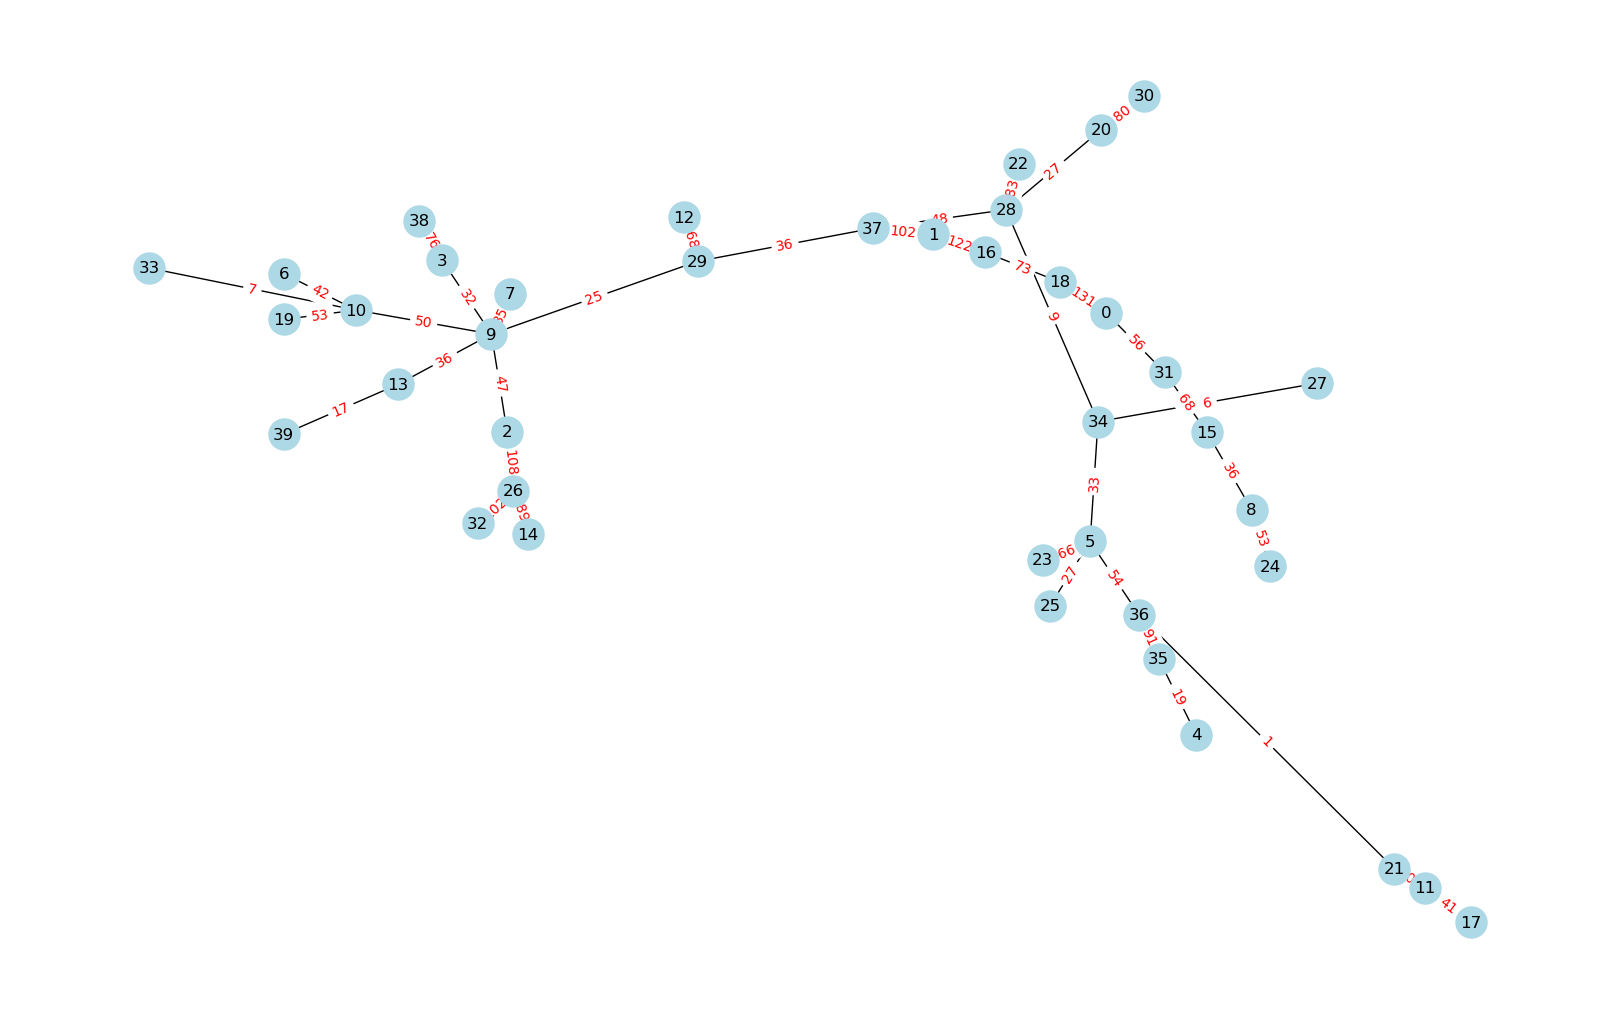

In [131]:
# Define positions for the nodes (you can use a layout algorithm for more complex graphs)
pos = nx.spring_layout(G_s)

# Extract edge weights as labels
edge_labels = {(u, v): d['weight'] for u, v, d in G_s.edges(data=True)}
plt.figure(figsize=(16, 10))
# Draw the graph with nodes and edge labels
nx.draw(G_s, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

# Display the graph
plt.axis('off')
plt.show()